In [1]:
import pandas as pd


file_path = "C:\\Users\\krmch\\OneDrive\\Desktop\\Online_Retail.xlsx"
data = pd.read_excel(file_path)



QUESTION 1 TRANSACTION DATA CLEANING 

In [2]:
data = data.dropna(subset=['Description', 'CustomerID'])

In [3]:
data = data[~data['InvoiceNo'].astype(str).str.startswith('C')]

In [4]:
data = data[data['Description'] != 'POSTAGE']

In [6]:

    
    
data['Date'] = data['InvoiceDate'].dt.date
data['CustomerID'] = data['CustomerID'].astype(int)
data['CombinedKey'] = data['Date'].astype(str) + '-' + data['CustomerID'].astype(str)
data = data.groupby(['CombinedKey', 'Description']).agg({'Quantity':'sum', 'Country':'first'}).reset_index()

In [7]:
items_counts = data['Description'].value_counts()
items_to_keep = items_counts[items_counts >= 1000].index
data = data[data['Description'].isin(items_to_keep)]


In [8]:
data = data[data['Country'] == 'United Kingdom']
number_of_records = len(data)
print(f"Number of records after cleaning: {number_of_records}")

Number of records after cleaning: 11224


In [9]:
data['Quantity'] = (data['Quantity'] > 0).astype(int) 
transactions = data.pivot_table(index='CombinedKey', columns='Description', values='Quantity', fill_value=0)

In [10]:
print(transactions.head())


Description       ASSORTED COLOUR BIRD ORNAMENT  JUMBO BAG RED RETROSPOT  \
CombinedKey                                                                
2010-12-01-12838                              0                        0   
2010-12-01-13047                              1                        0   
2010-12-01-13065                              0                        0   
2010-12-01-13408                              0                        0   
2010-12-01-13468                              0                        0   

Description       LUNCH BAG  BLACK SKULL.  LUNCH BAG RED RETROSPOT  \
CombinedKey                                                          
2010-12-01-12838                        0                        0   
2010-12-01-13047                        0                        0   
2010-12-01-13065                        0                        0   
2010-12-01-13408                        0                        0   
2010-12-01-13468                        0      

Q2: Frequent Items and Association Rules

In [11]:
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
import matplotlib.pyplot as plt
import seaborn as sns



In [12]:
apriori_itemsets = apriori(transactions, min_support=0.02, use_colnames=True)
print("Frequent itemsets using Apriori:")
print(apriori_itemsets)

Frequent itemsets using Apriori:
     support                                           itemsets
0   0.185286                    (ASSORTED COLOUR BIRD ORNAMENT)
1   0.205000                          (JUMBO BAG RED RETROSPOT)
2   0.141429                          (LUNCH BAG  BLACK SKULL.)
3   0.159714                          (LUNCH BAG RED RETROSPOT)
4   0.119857                  (PACK OF 72 RETROSPOT CAKE CASES)
5   0.183571                                    (PARTY BUNTING)
6   0.200429                         (REGENCY CAKESTAND 3 TIER)
7   0.143000                (SET OF 3 CAKE TINS PANTRY DESIGN )
8   0.265143               (WHITE HANGING HEART T-LIGHT HOLDER)
9   0.026857     (PARTY BUNTING, ASSORTED COLOUR BIRD ORNAMENT)
10  0.029714  (REGENCY CAKESTAND 3 TIER, ASSORTED COLOUR BIR...
11  0.037429  (WHITE HANGING HEART T-LIGHT HOLDER, ASSORTED ...
12  0.037857  (JUMBO BAG RED RETROSPOT, LUNCH BAG  BLACK SKU...
13  0.055000  (JUMBO BAG RED RETROSPOT, LUNCH BAG RED RETROS...
14  0.0

C:\Users\krmch\AppData\Roaming\Python\Python310\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [13]:
fpgrowth_itemsets = fpgrowth(transactions, min_support=0.02, use_colnames=True)
print("\nFrequent itemsets using FP-Growth:")
print(fpgrowth_itemsets)




Frequent itemsets using FP-Growth:
     support                                           itemsets
0   0.119857                  (PACK OF 72 RETROSPOT CAKE CASES)
1   0.185286                    (ASSORTED COLOUR BIRD ORNAMENT)
2   0.265143               (WHITE HANGING HEART T-LIGHT HOLDER)
3   0.200429                         (REGENCY CAKESTAND 3 TIER)
4   0.205000                          (JUMBO BAG RED RETROSPOT)
5   0.159714                          (LUNCH BAG RED RETROSPOT)
6   0.141429                          (LUNCH BAG  BLACK SKULL.)
7   0.183571                                    (PARTY BUNTING)
8   0.143000                (SET OF 3 CAKE TINS PANTRY DESIGN )
9   0.023714  (PACK OF 72 RETROSPOT CAKE CASES, LUNCH BAG RE...
10  0.022143  (JUMBO BAG RED RETROSPOT, PACK OF 72 RETROSPOT...
11  0.037429  (WHITE HANGING HEART T-LIGHT HOLDER, ASSORTED ...
12  0.029714  (REGENCY CAKESTAND 3 TIER, ASSORTED COLOUR BIR...
13  0.031857  (WHITE HANGING HEART T-LIGHT HOLDER, REGENCY C...
14  

C:\Users\krmch\AppData\Roaming\Python\Python310\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


My comparison of the outputs showed that the order of the itemsets is different between the two algorithms. This variation in order arises from their distinct operational mechanics. The FP-Growth algorithm doesn't prioritize itemsets by size during its generation process. Instead, it constructs an FP-tree, a compact structure that encapsulates the dataset, and then extracts frequent itemsets directly from this tree. As a result, the FP-Growth approach doesn't inherently sort the itemsets by size or frequency, leading to an unordered list in the output.

On the other hand, the Apriori algorithm operates through a breadth-first search pattern, generating smaller itemsets first and then extending them into larger ones, pruning as it goes. This iterative process naturally orders the itemsets by size, starting from the smallest.

When considering the performance aspect, I found that FP-Growth, with its streamlined database scans and direct extraction of itemsets from the FP-tree, is generally faster and more memory-efficient compared to Apriori. This is particularly beneficial when dealing with large datasets. Apriori's multiple database scans and extensive candidate generation make it slower, which becomes more pronounced as the size of the dataset grows.

Despite the differences, in the context of my project, both algorithms have proven to be equally effective in terms of the end result—they have provided me with a comprehensive list of itemsets that pass the minimum support threshold. The choice between these two would then be driven by the dataset size, memory, and processing power considerations, with FP-Growth being the more scalable option.

For my purposes, since the dataset did not pose significant computational challenges, either algorithm would have been suitable. However, for future scalability and performance optimization, especially as the dataset grows, I would lean towards employing the FP-Growth algorithm for frequent itemset mining tasks.

In [25]:
rules = association_rules(apriori_itemsets, metric="confidence", min_threshold=0.5)
print("\nAssociation Rules:")
print(rules)




Association Rules:
                                         antecedents  \
0  (JUMBO BAG RED RETROSPOT, LUNCH BAG  BLACK SKU...   

                 consequents  antecedent support  consequent support  \
0  (LUNCH BAG RED RETROSPOT)            0.037857            0.159714   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.024714     0.65283  4.087488  0.018668    2.420388       0.785072  


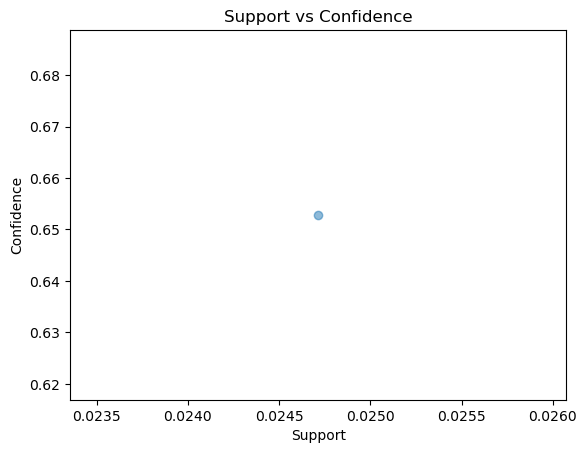

In [26]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()


In [27]:

filtered_rules = rules[(rules['support'] > 0.028) & (rules['confidence'] > 0.5)]
print("Rules with support > 0.028 and confidence > 0.5:")
print(filtered_rules)

Rules with support > 0.028 and confidence > 0.5:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


In [28]:
important_rules = rules[(rules['support'] > 0.028) & (rules['confidence'] > 0.5)]

In [29]:
pivot = important_rules.pivot(index='consequents', columns='antecedents', values='lift')
plt.figure(figsize=(10,10))
sns.heatmap(pivot, annot=True, cmap="YlGnBu")
plt.title('Heatmap of Important Association Rules')
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1000x1000 with 0 Axes>